### Import libraries

In [1]:
import numpy as np
import pandas as pd
import sklearn
import sklearn.preprocessing, sklearn.cluster, sklearn.metrics
import scipy.spatial
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, StratifiedKFold, KFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, confusion_matrix, auc
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from prettytable import PrettyTable 

### Loading dataset

In [2]:
df = pd.read_csv("BankChurners.csv")
df = df.iloc[:,:-2]
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


### We drop last 2 columns

# Dataset of Credit Card Customers
Available attributes include:
- `CLIENTNUM`: Unique identifier for the customer holding the account.
- `Attrition_Flag`:  event (customer activity) variable - if the account is closed then 1 else 0
- `Customer_Age`: Customer's Age in Years
- `Gender`: M=Male, F=Female
- `Dependent_count`: Number of dependents
- `Education_Level`: Educational Qualification of the account holder (example: high school, college graduate, etc.)
- `Marital_Status`: Married, Single, Divorced, Unknown
- `Income_Category`: Annual Income Category of the account holder (< $40K, $40K - 60K, $60K - $80K, $80K-$120K, > $120K, Unknown)
- `Card_Category`: Type of Card (Blue, Silver, Gold, Platinum)
- `Monthsonbook `: Period of relationship with bank
- `TotalRelationshipCount `: Total no. of products held by the customer
- `MonthsInactive12_mon `: No. of months inactive in the last 12 months
- `ContactsCount12_mon`: No. of Contacts in the last 12 months
- `Credit_Limit `: Credit Limit on the Credit Card
- `TotalRevolvingBal `: Total Revolving Balance on the Credit Card
- `AvgOpenTo_Buy `: Open to Buy Credit Line (Average of last 12 months)
- `TotalAmtChngQ4Q1 `: Change in Transaction Amount (Q4 over Q1)
- `TotalTransAmt `: Total Transaction Amount (Last 12 months)
- `TotalTransCt  `: Total Transaction Count (Last 12 months)
- `TotalCtChngQ4Q1  `: Change in Transaction Count (Q4 over Q1)
- `AvgUtilizationRatio  `: Average Card Utilization Ratio

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  object 
 6   Marital_Status            10127 non-null  object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

### Get basic info about the dataset (number of rows/columns, data types, missing values)

In [4]:
df.describe()

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,1.012700e+04,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,7.391776e+08,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894
std,3.690378e+07,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691
min,7.080821e+08,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000
25%,7.130368e+08,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000
50%,7.179264e+08,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000
75%,7.731435e+08,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000
max,8.283431e+08,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000


### Display statistical values (mean, median, min, max) for numerical columns

### Count the number of missing values in each column

In [5]:
df.isna().sum().sort_values(ascending=False)

CLIENTNUM                   0
Months_Inactive_12_mon      0
Total_Ct_Chng_Q4_Q1         0
Total_Trans_Ct              0
Total_Trans_Amt             0
Total_Amt_Chng_Q4_Q1        0
Avg_Open_To_Buy             0
Total_Revolving_Bal         0
Credit_Limit                0
Contacts_Count_12_mon       0
Total_Relationship_Count    0
Attrition_Flag              0
Months_on_book              0
Card_Category               0
Income_Category             0
Marital_Status              0
Education_Level             0
Dependent_count             0
Gender                      0
Customer_Age                0
Avg_Utilization_Ratio       0
dtype: int64

### There are not empty values, so there is no need to remove 

### Count rows and attributes

In [6]:
shape = df.shape
shape

(10127, 21)

This dataset contains 10127 records of customers with 21 attributes
### Lets see, what data types our dataset have

In [7]:
dtypes = df.dtypes
dtypes

CLIENTNUM                     int64
Attrition_Flag               object
Customer_Age                  int64
Gender                       object
Dependent_count               int64
Education_Level              object
Marital_Status               object
Income_Category              object
Card_Category                object
Months_on_book                int64
Total_Relationship_Count      int64
Months_Inactive_12_mon        int64
Contacts_Count_12_mon         int64
Credit_Limit                float64
Total_Revolving_Bal           int64
Avg_Open_To_Buy             float64
Total_Amt_Chng_Q4_Q1        float64
Total_Trans_Amt               int64
Total_Trans_Ct                int64
Total_Ct_Chng_Q4_Q1         float64
Avg_Utilization_Ratio       float64
dtype: object

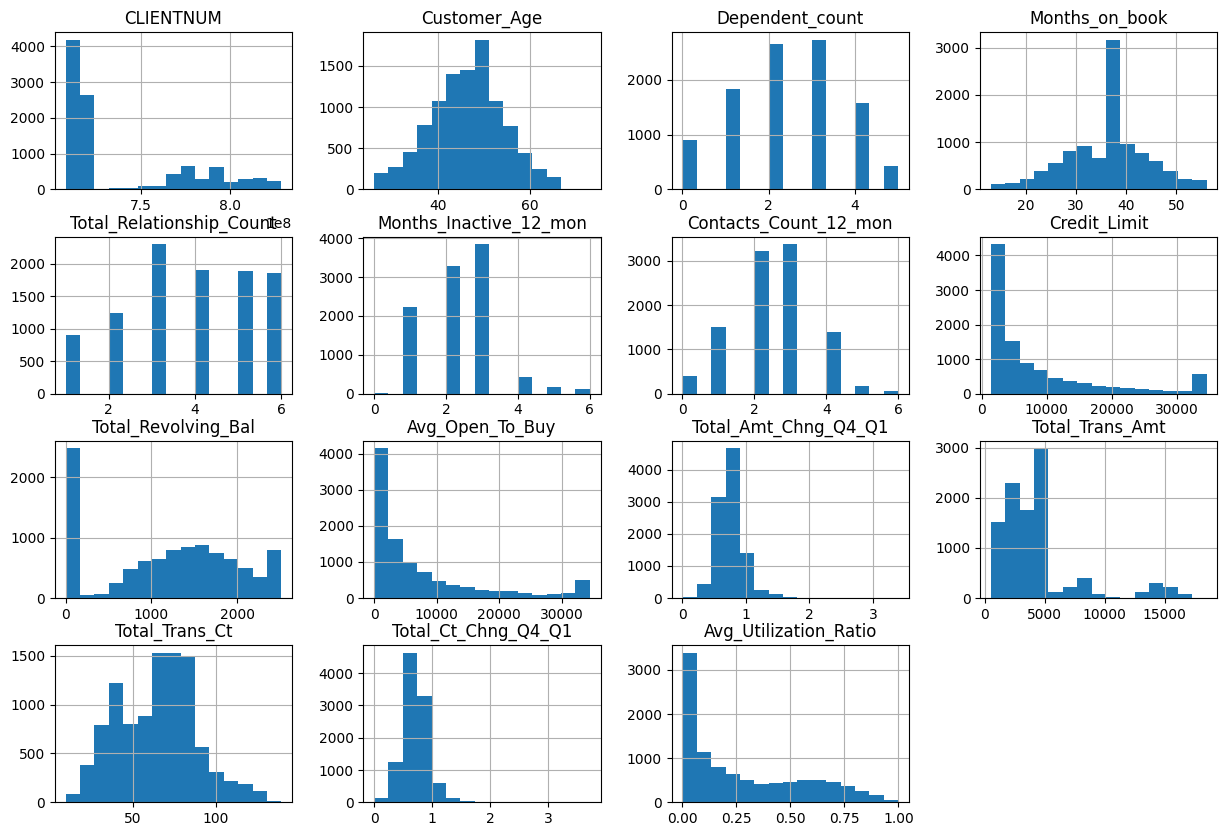

In [8]:
df.hist(bins=15, figsize=(15, 10))
plt.show()

### Histograms for Numerical Features

This set of histograms illustrates the distributions of numerical features in the dataset. Key observations:
- `Customer_Age` follows a roughly normal distribution with most customers between 40 and 50 years old.
- `Months_on_book` indicates that customers typically maintain a relationship with the bank for 35–40 months.
- `Credit_Limit` is highly skewed, with many customers having lower credit limits.
- Features like `Avg_Open_To_Buy`, `Total_Revoling_Bal` and `Avg_Utilization_Ratio` are also skewed, indicating potential outliers or a need for transformation.


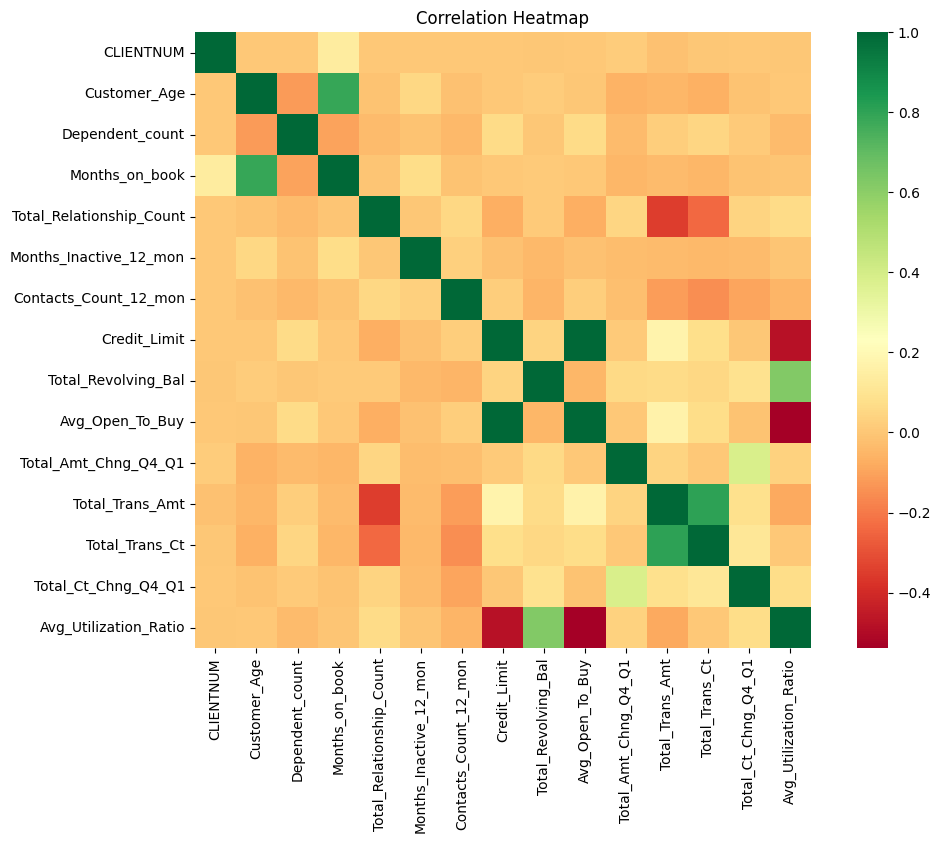

In [9]:
numerical_cols = df.select_dtypes(include=['number'])

plt.figure(figsize=(12, 8))
sns.heatmap(numerical_cols.corr(), square=True, cmap='RdYlGn')
plt.title("Correlation Heatmap")
plt.show()

### Correlation Heatmap

This heatmap shows the correlations between numerical features in the dataset. Observations:
- High positive correlation between `Total_Trans_Amt` and `Total_Trans_Ct` suggests that as the number of transactions increases, so does the total transaction amount.
- **Strong correlation**:
    - `Avg_Open_To_Buy` and `Credit_Limit`: strongly correlated, as expected.
    - `Monthsonbook` and `Customer_Age`: strongly correlated, which means that lot of customer are loyal for long period of time.
- **Weak correlation**:
    - `Avg_Utilization_Ratio` and `Credit_Limit`: The low correlation means that the percentage of credit used by customers is not strongly influenced by their total credit limit. This suggests that credit utilization reflects individual spending habits rather than credit availability.
    - `Avg_Utilization_Ratio` and `Avg_Open_To_Buy`: The low correlation indicates that the remaining credit available does not significantly affect how much credit a customer uses. This highlights that `Avg_Utilization_Ratio` captures unique customer behavior patterns.


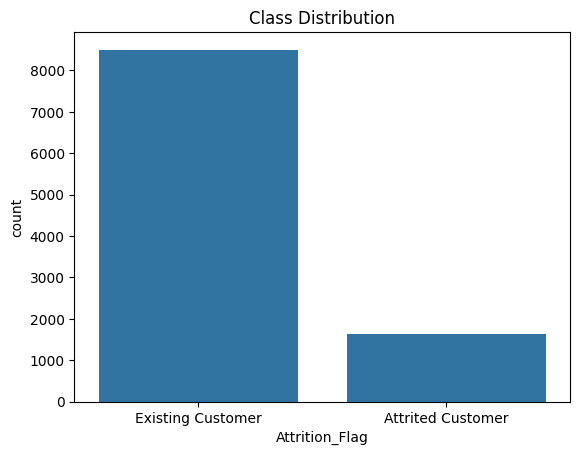

In [10]:
sns.countplot(x='Attrition_Flag', data=df)
plt.title('Class Distribution')
plt.show()

### Class Distribution

This bar chart shows the distribution of the target variable, `Attrition_Flag`. Significantly more customers are labeled as 'Existing Customer' compared to 'Attrited Customer.' 

# We will move on preprocessing

### Lets drop columns that are not needed

In [11]:
df = df.drop(columns=['CLIENTNUM'])
df.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [12]:
label_enc = sklearn.preprocessing.LabelEncoder()
df['Attrition_Flag'] = label_enc.fit_transform(df['Attrition_Flag']) 
df['Gender'] = label_enc.fit_transform(df['Gender'])

df_encoded = pd.get_dummies(df, columns=['Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category'])
df_encoded.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,...,Income_Category_$120K +,Income_Category_$40K - $60K,Income_Category_$60K - $80K,Income_Category_$80K - $120K,Income_Category_Less than $40K,Income_Category_Unknown,Card_Category_Blue,Card_Category_Gold,Card_Category_Platinum,Card_Category_Silver
0,1,45,1,3,39,5,1,3,12691.0,777,...,False,False,True,False,False,False,True,False,False,False
1,1,49,0,5,44,6,1,2,8256.0,864,...,False,False,False,False,True,False,True,False,False,False
2,1,51,1,3,36,4,1,0,3418.0,0,...,False,False,False,True,False,False,True,False,False,False
3,1,40,0,4,34,3,4,1,3313.0,2517,...,False,False,False,False,True,False,True,False,False,False
4,1,40,1,3,21,5,1,0,4716.0,0,...,False,False,True,False,False,False,True,False,False,False


#### **Label Encoding for `Attrition_Flag` and `Gender`**
- **`Attrition_Flag`**:
  - This column is binary (`Existing`/`Attrited`).
  - Label Encoding is efficient and appropriate for binary features because it converts the categories into integers (`0` and `1`) without introducing unnecessary complexity.

- **`Gender`**:
  - This column is also binary (`Male`/`Female`).
  - Label Encoding works well here for the same reasons as above. It assigns simple numeric labels (`0` and `1`) to the two categories, which are sufficient for the model to differentiate them.

#### **One-Hot Encoding for Nominal Columns**
- **Columns Encoded**: `Education_Level`, `Marital_Status`, `Income_Category`, and `Card_Category`.
- These columns are **nominal categorical variables**, meaning their categories have no natural order (e.g., "High School" is not greater or less than "Graduate").
- One-Hot Encoding is used to:
  - Avoid introducing a false ordinal relationship.
  - Represent each category as a separate binary column, ensuring that the model treats them independently.

In [13]:
duplicateRows = df_encoded.duplicated().sum()
print("There are " + str(duplicateRows) + " duplicate rows in the dataset.")

There are 0 duplicate rows in the dataset.


### There are no duplicate rows in dataset

In [14]:
power_transform_features = ['Months_on_book', 'Credit_Limit', 'Total_Revolving_Bal', 
                            'Avg_Open_To_Buy', 'Avg_Utilization_Ratio']
min_max_features = [col for col in df_encoded.columns if col not in power_transform_features and col != 'Attrition_Flag']

power_transformer = sklearn.preprocessing.PowerTransformer()  
df_encoded[power_transform_features] = power_transformer.fit_transform(df_encoded[power_transform_features])

min_max_scaler = sklearn.preprocessing.MinMaxScaler()
df_encoded[min_max_features] = min_max_scaler.fit_transform(df_encoded[min_max_features])

### Scaling
To ensure the dataset is appropriately scaled for modeling, we applied the following transformations:

1. **PowerTransformer**:
   - Applied to skewed features (`Months_on_book`, `Credit_Limit`, `Total_Revolving_Bal`, `Avg_Open_To_Buy`, and `Avg_Utilization_Ratio`) to reduce skewness and make their distributions closer to normal. 

2. **Min-Max Scaling**:
   - Applied to the remaining features (excluding `Attrition_Flag`) to scale them to the range [0, 1]. This ensures all features contribute equally to distance-based or gradient-based models like k-NN, SVM, or Neural Networks.

In [15]:
X, y = df_encoded.drop('Attrition_Flag', axis=1), df_encoded['Attrition_Flag']

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)

In [17]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((8101, 36), (2026, 36), (8101,), (2026,))

### Splitting the Dataset
- **Purpose**: Split the dataset into training and testing sets to evaluate model performance.
- **Details**:
  - `test_size=0.2`: Allocates 20% of the data for testing and 80% for training.
  - `random_state=13`: Ensures reproducibility of results.


# **DecisionTree** 

In [18]:
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

DecisionTreeClassifier()

### Training the Decision Tree Model
- **Purpose**: Train a Decision Tree classifier using the training dataset (`X_train`, `y_train`).

In [19]:
y_pred = clf.predict(X_test)

### Making Predictions
- **Purpose**: Use the trained Decision Tree model to predict the target variable for the test dataset (`X_test`).
- **Output**: Predictions stored in `y_pred`.


In [20]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

Accuracy: 0.9245
Precision: 0.9547
Recall: 0.9552
F1-Score: 0.9549


### Decision Tree Model Performance

The Decision Tree model was evaluated on the test dataset using the following metrics:

- **Accuracy**: `0.9245`
  - The model correctly predicted `92.45%` of the test samples.
  - High accuracy indicates strong overall performance.

- **Precision**: `0.9547`
  - Out of all the samples predicted as positive (e.g., `Attrited Customer`), `95.47%` were actually correct.
  - High precision means the model is good at minimizing false positives.

- **Recall**: `0.9552`
  - Out of all actual positive samples, the model correctly identified `95.52%`.
  - High recall shows that the model captures most of the positive cases, minimizing false negatives.

- **F1-Score**: `0.9549`
  - The F1-score balances Precision and Recall, resulting in a harmonic mean of `95.49%`.
  - This high score indicates the model performs well across both false positives and false negatives, making it robust for this classification task.

<Axes: >

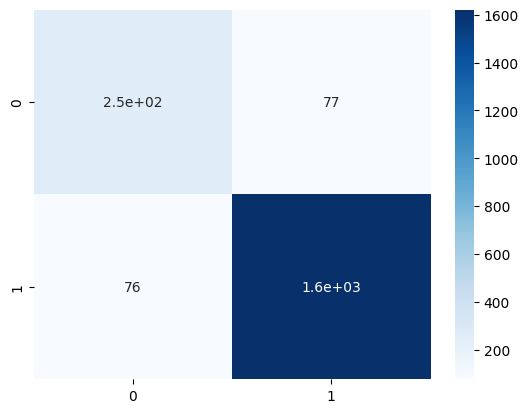

In [21]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap="Blues")

In [22]:
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
tn, fp, fn, tp

(252, 77, 76, 1621)

### Why F1-Score Was Chosen
F1-Score balances Precision and Recall, making it ideal for imbalanced datasets like customer churn prediction. It ensures we correctly identify most churners while minimizing unnecessary targeting of non-churners. This is crucial for effective customer retention strategies.

In [23]:
skf = KFold(n_splits=5, shuffle=False)
scores = list()
for train_index, test_index in skf.split(X, y):
    X_train, X_test = X.iloc[train_index, :], X.iloc[test_index, :]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    clf = DecisionTreeClassifier()
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    scores.append(f1_score(y_test, y_pred))
np.mean(scores), np.min(scores), np.max(scores)

(0.9219159816759925, 0.8474781032920568, 0.9638258736971184)

### Interpretation of K-Fold Results
The average F1-Score of **0.9219** shows the model performs well overall, balancing Precision and Recall. The range from **0.8474** (minimum) to **0.9638** (maximum) suggests slight variability depending on the test fold. This indicates good performance with some room for improvement.


#### **Random Forest**
- **Description**:
  - An ensemble method that builds multiple decision trees and averages their predictions.
  - Reduces overfitting compared to a single Decision Tree.
- **Advantages**:
  - Robust and stable.
  - Handles missing and categorical data well.
  - Works effectively on larger datasets.
- **Disadvantages**:
  - Less interpretable than a single Decision Tree.
  - More computationally expensive.

In [24]:
skf = KFold(n_splits=5, shuffle=True)
scores = list()
for train_index, test_index in skf.split(X, y):
    X_train, X_test = X.iloc[train_index, :], X.iloc[test_index, :]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    clf = RandomForestClassifier(max_depth=2, random_state=0)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    scores.append(f1_score(y_test, y_pred))
    
np.mean(scores), np.min(scores), np.max(scores)

(0.916709017506467, 0.9127371273712737, 0.9220466113045808)

#### **k-Nearest Neighbors (k-NN)**
- **Description**:
  - A distance-based algorithm that classifies a sample based on the majority class of its `k` nearest neighbors.
  - The parameter `k` determines the number of neighbors considered for the vote.
- **Advantages**:
  - Simple and intuitive.
  - Works well for localized patterns in the data.
- **Disadvantages**:
  - Sensitive to feature scaling and irrelevant features.
  - Computationally expensive for large datasets.

In [25]:
skf = KFold(n_splits=5, shuffle=True, random_state=13)
scores = list()
for train_index, test_index in skf.split(X, y):
    X_train, X_test = X.iloc[train_index, :], X.iloc[test_index, :]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    knn = KNeighborsClassifier(n_neighbors=5) 
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores.append(f1_score(y_test, y_pred))
    
np.mean(scores), np.min(scores), np.max(scores)


(0.9088201913096361, 0.9051339285714286, 0.9117728917339271)

**Multi-layer Perceptron (MLP)**
- **Description**:
  - A neural network model that uses multiple layers to learn complex, non-linear relationships.
  - Requires numerical inputs and proper scaling.
- **Advantages**:
  - Can model non-linear decision boundaries.
  - Effective for datasets with complex patterns.
- **Disadvantages**:
  - Requires careful tuning of hyperparameters.
  - Computationally intensive compared to simpler models.

In [26]:
skf = KFold(n_splits=5, shuffle=True)
scores = list()
for train_index, test_index in skf.split(X, y):
    X_train, X_test = X.iloc[train_index, :], X.iloc[test_index, :]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    clf = MLPClassifier(hidden_layer_sizes=(5,3), activation='relu', solver='adam', max_iter=1000, random_state=13)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    scores.append(f1_score(y_test, y_pred))
    
np.mean(scores), np.min(scores), np.max(scores)

(0.9463650192947359, 0.9443643701354857, 0.9496279336004579)

# **Hyper tuning**

In [27]:
metrics = PrettyTable(["Algorithm", "Parameters", "Min", "Avg", "Max"]) 

## DecisionTree

max_feature = sqrt

In [28]:
skf = KFold(n_splits=5, shuffle=False)
scores = list()
for train_index, test_index in skf.split(X, y):
    X_train, X_test = X.iloc[train_index, :], X.iloc[test_index, :]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    clf = DecisionTreeClassifier(max_features = 'sqrt')
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    scores.append(f1_score(y_test, y_pred))
metrics.add_row(["DecisionTree", "max_features = sqrt", np.min(scores), np.mean(scores), np.max(scores)])       
np.mean(scores), np.min(scores), np.max(scores)

(0.9219518342545555, 0.8810082063305978, 0.956732223903177)

max_feature = sqrt, max_depth = 10

In [29]:
skf = KFold(n_splits=5, shuffle=False)
scores = list()
for train_index, test_index in skf.split(X, y):
    X_train, X_test = X.iloc[train_index, :], X.iloc[test_index, :]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    clf = DecisionTreeClassifier(max_features = 'sqrt', max_depth = 10)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    scores.append(f1_score(y_test, y_pred))
metrics.add_row(["DecisionTree", "max_features = sqrt, max_depth = 10", np.min(scores), np.mean(scores), np.max(scores)])       
np.mean(scores), np.min(scores), np.max(scores)

(0.9197054580095914, 0.8704142011834319, 0.942162615255658)

## Random forest

n_estimators = 50

In [30]:
skf = KFold(n_splits=5, shuffle=True)
scores = list()
for train_index, test_index in skf.split(X, y):
    X_train, X_test = X.iloc[train_index, :], X.iloc[test_index, :]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    clf = RandomForestClassifier(n_estimators = 50)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    scores.append(f1_score(y_test, y_pred))
metrics.add_row(["RandomForest", "n_estimators = 50", np.min(scores), np.mean(scores), np.max(scores)])  
np.mean(scores), np.min(scores), np.max(scores)

(0.9762559089442882, 0.9740902474526929, 0.9794841735052755)

min_samples_split = 5

In [31]:
skf = KFold(n_splits=5, shuffle=True)
scores = list()
for train_index, test_index in skf.split(X, y):
    X_train, X_test = X.iloc[train_index, :], X.iloc[test_index, :]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    clf = RandomForestClassifier(min_samples_split = 5)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    scores.append(f1_score(y_test, y_pred))
metrics.add_row(["RandomForest", "min_samples_split = 5", np.min(scores), np.mean(scores), np.max(scores)])  
np.mean(scores), np.min(scores), np.max(scores)

(0.9745870221303286, 0.9716953603735046, 0.9783923941227312)

## k-NN

n_neighbors = 10

In [32]:
skf = KFold(n_splits=5, shuffle=True)
scores = list()
for train_index, test_index in skf.split(X, y):
    X_train, X_test = X.iloc[train_index, :], X.iloc[test_index, :]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    knn = KNeighborsClassifier(n_neighbors=10)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores.append(f1_score(y_test, y_pred))
metrics.add_row(["k-NN", "n_neighbors = 10", np.min(scores), np.mean(scores), np.max(scores)])  
np.mean(scores), np.min(scores), np.max(scores)

(0.9091823925014457, 0.908228730822873, 0.9104560622914349)

n_neighbors=5, weights='distance'

In [33]:
skf = KFold(n_splits=5, shuffle=True)
scores = list()
for train_index, test_index in skf.split(X, y):
    X_train, X_test = X.iloc[train_index, :], X.iloc[test_index, :]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    knn = KNeighborsClassifier(n_neighbors=5, weights='distance')
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores.append(f1_score(y_test, y_pred))
metrics.add_row(["k-NN", "n_neighbors = 5, weights = 'distance'", np.min(scores), np.mean(scores), np.max(scores)])  
np.mean(scores), np.min(scores), np.max(scores)

(0.9094186664741267, 0.9001967950520101, 0.9161793372319688)

## MLP

hidden_layer_sizes = 10, activation = relu, solver = adam

In [34]:
skf = KFold(n_splits=5, shuffle=True, random_state=13)
scores = list()
for train_index, test_index in skf.split(X, y):
    X_train, X_test = X.iloc[train_index, :], X.iloc[test_index, :]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    clf = MLPClassifier(hidden_layer_sizes=(10,), activation='relu', solver='adam', max_iter=1000, random_state=13)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    scores.append(f1_score(y_test, y_pred))
metrics.add_row(["MLP", "hidden_layer_sizes = (10,), activation = 'relu', solver = 'adam'", np.min(scores), np.mean(scores), np.max(scores)])  
np.mean(scores), np.min(scores), np.max(scores)

(0.9585796763490221, 0.9573046761545164, 0.9601386481802426)

hidden_layer_sizes = (20,10), activation = relu, solver = adam

In [35]:
skf = KFold(n_splits=5, shuffle=True)
scores = list()
for train_index, test_index in skf.split(X, y):
    X_train, X_test = X.iloc[train_index, :], X.iloc[test_index, :]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    clf = MLPClassifier(hidden_layer_sizes=(20, 10), activation='relu', solver='adam', max_iter=1000, random_state=13)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    scores.append(f1_score(y_test, y_pred))
metrics.add_row(["MLP", "hidden_layer_sizes = (20, 10), activation = 'relu', solver = 'adam'",np.min(scores), np.mean(scores), np.max(scores)])  
np.mean(scores), np.min(scores), np.max(scores)

(0.9578438185949022, 0.954248366013072, 0.9604221635883905)

hidden_layer_sizes=(10,), activation='tanh', solver='adam'

In [36]:
skf = KFold(n_splits=5, shuffle=True)
scores = list()
for train_index, test_index in skf.split(X, y):
    X_train, X_test = X.iloc[train_index, :], X.iloc[test_index, :]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    clf = MLPClassifier(hidden_layer_sizes=(10,), activation='tanh', solver='adam', max_iter=1000, random_state=13)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    scores.append(f1_score(y_test, y_pred))
metrics.add_row(["MLP", "hidden_layer_sizes = (10,), activation = 'tanh', solver = 'adam'",np.min(scores), np.mean(scores), np.max(scores)])  
np.mean(scores), np.min(scores), np.max(scores)

(0.9583403185017592, 0.9531341534856473, 0.9615723085948958)

hidden_layer_sizes=(10,), activation='relu', solver='sgd'

In [37]:
skf = KFold(n_splits=5, shuffle=True)
scores = list()
for train_index, test_index in skf.split(X, y):
    X_train, X_test = X.iloc[train_index, :], X.iloc[test_index, :]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    clf = MLPClassifier(hidden_layer_sizes=(10,), activation='relu', solver='sgd', max_iter=1000, random_state=13)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    scores.append(f1_score(y_test, y_pred))
metrics.add_row(["MLP", "hidden_layer_sizes = (10,), activation = 'relu', solver = 'sgd'", np.min(scores), np.mean(scores), np.max(scores)])  
np.mean(scores), np.min(scores), np.max(scores)

(0.9457530673526031, 0.9365994236311239, 0.9544678429140581)

hidden_layer_sizes=(10,), activation='relu', solver='adam', alpha=0.001

In [38]:
skf = KFold(n_splits=5, shuffle=True)
scores = list()
for train_index, test_index in skf.split(X, y):
    X_train, X_test = X.iloc[train_index, :], X.iloc[test_index, :]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    clf = MLPClassifier(hidden_layer_sizes=(10,), activation='relu', solver='adam', alpha=0.001, max_iter=1000, random_state=13)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    scores.append(f1_score(y_test, y_pred))
metrics.add_row(["MLP", "hidden_layer_sizes = (10,), activation = 'relu', solver = 'adam', alpha = 0.001",np.min(scores), np.mean(scores), np.max(scores)])  
np.mean(scores), np.min(scores), np.max(scores)

(0.9589141527570181, 0.950367107195301, 0.9635936582501468)

hidden_layer_sizes=(50,25,10), activation='relu', solver='adam'

In [39]:
skf = KFold(n_splits=5, shuffle=True)
scores = list()
for train_index, test_index in skf.split(X, y):
    X_train, X_test = X.iloc[train_index, :], X.iloc[test_index, :]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    clf = MLPClassifier(hidden_layer_sizes=(50, 25, 10), activation='relu', solver='adam', max_iter=1000, random_state=13)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    scores.append(f1_score(y_test, y_pred))
metrics.add_row(["MLP", "hidden_layer_sizes = (50,25,10), activation = 'relu', solver = 'adam'",np.min(scores), np.mean(scores), np.max(scores)])  
np.mean(scores), np.min(scores), np.max(scores)

(0.944354508654962, 0.9411418481459682, 0.9516407599309153)

hidden_layer_sizes=(20, 10), activation='tanh', solver='adam'

In [40]:
skf = KFold(n_splits=5, shuffle=True)
scores = list()
for train_index, test_index in skf.split(X, y):
    X_train, X_test = X.iloc[train_index, :], X.iloc[test_index, :]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    clf = MLPClassifier(hidden_layer_sizes=(20, 10), activation='tanh', solver='adam', max_iter=1000, random_state=13)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    scores.append(f1_score(y_test, y_pred))
metrics.add_row(["MLP", "hidden_layer_sizes = (20,10), activation = 'tanh', solver = 'adam'", np.min(scores), np.mean(scores), np.max(scores)])  
np.mean(scores), np.min(scores), np.max(scores)

(0.9573897989809902, 0.9468147282291058, 0.9643882825962091)

hidden_layer_sizes=(20, 10), activation='tanh', solver='adam'

In [41]:
skf = KFold(n_splits=5, shuffle=True)
scores = list()
for train_index, test_index in skf.split(X, y):
    X_train, X_test = X.iloc[train_index, :], X.iloc[test_index, :]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    clf = MLPClassifier(hidden_layer_sizes=(20, 10), activation='tanh', solver='adam', max_iter=1000, random_state=13)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    scores.append(f1_score(y_test, y_pred))
metrics.add_row(["MLP", "hidden_layer_sizes = (20,10), activation = 'tanh', solver = 'adam'",np.min(scores), np.mean(scores), np.max(scores)])  
np.mean(scores), np.min(scores), np.max(scores)

(0.9590196245246189, 0.9538551401869159, 0.9651128701260627)

hidden_layer_sizes=(10), activation='relu', solver='adam', learning_rate='adaptive'

In [42]:
skf = KFold(n_splits=5, shuffle=True)
scores = list()
for train_index, test_index in skf.split(X, y):
    X_train, X_test = X.iloc[train_index, :], X.iloc[test_index, :]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    clf = MLPClassifier(hidden_layer_sizes=(10,), activation='relu', solver='adam', learning_rate='adaptive', max_iter=1000, random_state=13)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    scores.append(f1_score(y_test, y_pred))
metrics.add_row(["MLP", "hidden_layer_sizes = (10), activation = 'relu', solver = 'adam', learning_rate = 'adaptive'",np.min(scores), np.mean(scores), np.max(scores)])   
np.mean(scores), np.min(scores), np.max(scores)

(0.9577929544294557, 0.955425219941349, 0.9606253618992473)

hidden_layer_sizes=(15), activation='logistic', solver='adam'

In [43]:
skf = KFold(n_splits=5, shuffle=True)
scores = list()
for train_index, test_index in skf.split(X, y):
    X_train, X_test = X.iloc[train_index, :], X.iloc[test_index, :]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    clf = MLPClassifier(hidden_layer_sizes=(15,), activation='logistic', solver='adam', max_iter=2000, random_state=13)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    scores.append(f1_score(y_test, y_pred))
metrics.add_row(["MLP", "hidden_layer_sizes = (15), activation = 'logistic', solver = 'adam'", np.min(scores), np.mean(scores), np.max(scores)])  
np.mean(scores), np.min(scores), np.max(scores)

(0.9601293106407025, 0.956597727934751, 0.9641712787649286)

hidden_layer_sizes=(50, 25), activation='relu', solver='lbfgs

In [44]:
skf = KFold(n_splits=5, shuffle=True)
scores = list()
for train_index, test_index in skf.split(X, y):
    X_train, X_test = X.iloc[train_index, :], X.iloc[test_index, :]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    clf = MLPClassifier(hidden_layer_sizes=(50, 25), activation='relu', solver='adam', max_iter=2000, random_state=13, early_stopping=True)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    scores.append(f1_score(y_test, y_pred))
metrics.add_row(["MLP", "hidden_layer_sizes = (50,25), activation = 'relu', solver = 'adam', early_stopping = True",np.min(scores), np.mean(scores), np.max(scores)])  
np.mean(scores), np.min(scores), np.max(scores)

(0.9482617073487806, 0.9407185628742515, 0.9518870642466148)

In [45]:
for row in metrics._rows:
    row[2] = f"{float(row[2]):.4f}" 
    row[3] = f"{float(row[3]):.4f}"  
    row[4] = f"{float(row[4]):.4f}"  

print(metrics)

+--------------+---------------------------------------------------------------------------------------------+--------+--------+--------+
|  Algorithm   |                                          Parameters                                         |  Min   |  Avg   |  Max   |
+--------------+---------------------------------------------------------------------------------------------+--------+--------+--------+
| DecisionTree |                                     max_features = sqrt                                     | 0.8810 | 0.9220 | 0.9567 |
| DecisionTree |                             max_features = sqrt, max_depth = 10                             | 0.8704 | 0.9197 | 0.9422 |
| RandomForest |                                      n_estimators = 50                                      | 0.9741 | 0.9763 | 0.9795 |
| RandomForest |                                    min_samples_split = 5                                    | 0.9717 | 0.9746 | 0.9784 |
|     k-NN     |                  

# **Conclusion**

I have tried several algorithms, including Decision Tree, Random Forest, and MLP, among others. Random Forest achieved the best results with an average F1 score of **0.9763**, demonstrating its suitability for churn prediction. This performance makes it a strong candidate for deployment in identifying customers at risk of attrition, enabling targeted retention strategies.

The MLP algorithm showed solid performance with different configurations but required significant tuning and computational resources, which could limit its practicality. The Decision Tree model provided a baseline with good interpretability, though its performance was lower than that of the ensemble methods.

Hyperparameter tuning was critical to improving model performance, particularly for the MLP.